In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

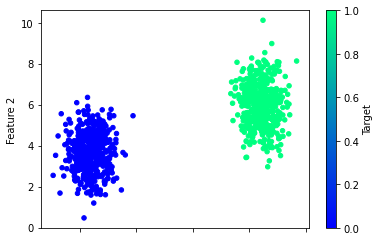

In [4]:
# Generate dummy dataset

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data

df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plot the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [6]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

2022-06-28 09:33:33.983376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.7999 - accuracy: 0.0253
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.7288 - accuracy: 0.0240
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.6614 - accuracy: 0.0267
Epoch 4/100
24/24 [==============================] - 0s 911us/step - loss: 1.5976 - accuracy: 0.0280
Epoch 5/100
24/24 [==============================] - 0s 955us/step - loss: 1.5358 - accuracy: 0.0253
Epoch 6/100
24/24 [==============================] - 0s 894us/step - loss: 1.4783 - accuracy: 0.0267
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 1.4225 - accuracy: 0.0280
Epoch 8/100
24/24 [==============================] - 0s 919us/step - loss: 1.3712 - accuracy: 0.0320
Epoch 9/100
24/24 [==============================] - 0s 967us/step - loss: 1.3212 - accuracy: 0.0373
Epoch 10/100
24/24 [==============================] - 0s 903us/step - loss: 1.2746 - accuracy: 0.04

24/24 [==============================] - 0s 878us/step - loss: 0.6939 - accuracy: 0.5000
Epoch 83/100
24/24 [==============================] - 0s 949us/step - loss: 0.6939 - accuracy: 0.5000
Epoch 84/100
24/24 [==============================] - 0s 887us/step - loss: 0.6938 - accuracy: 0.5000
Epoch 85/100
24/24 [==============================] - 0s 934us/step - loss: 0.6938 - accuracy: 0.5013
Epoch 86/100
24/24 [==============================] - 0s 938us/step - loss: 0.6938 - accuracy: 0.5013
Epoch 87/100
24/24 [==============================] - 0s 849us/step - loss: 0.6937 - accuracy: 0.5013
Epoch 88/100
24/24 [==============================] - 0s 879us/step - loss: 0.6937 - accuracy: 0.5013
Epoch 89/100
24/24 [==============================] - 0s 907us/step - loss: 0.6937 - accuracy: 0.5013
Epoch 90/100
24/24 [==============================] - 0s 939us/step - loss: 0.6936 - accuracy: 0.5013
Epoch 91/100
24/24 [==============================] - 0s 912us/step - loss: 0.6936 - accuracy: 

<AxesSubplot:>

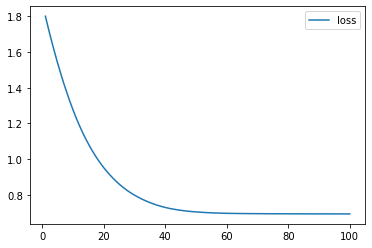

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

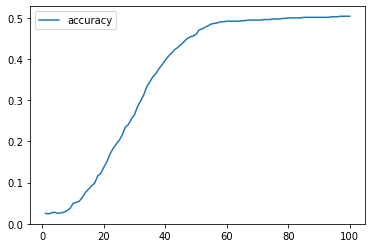

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6941 - accuracy: 0.4800 - 119ms/epoch - 15ms/step
Loss: 0.6940847635269165, Accuracy: 0.47999998927116394


In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 64ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

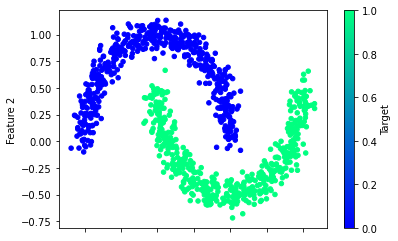

In [18]:
# To test this behavior, let's generate some new dummy data. This time we'll generate some nonlinear 
# moon-shaped data using Scikit-learn's make_moons method and visualize it using Pandas and Matplotlib.
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5320
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5320
Epoch 3/100
 1/24 [>.............................] - ETA: 0s - loss: 0.6947 - accuracy: 0.4688

2022-06-28 09:51:08.132385: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_BOOL
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_LEGACY_VARIANT
    }
  }
}

	while inferring type of node 'binary_crossentropy/cond/output/_10'


24/24 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5320
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5320
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5320
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5320
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5320
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5320
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5320
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5320
Epoch 11/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5320
Epoch 12/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5320
Epoch 13/100
24/24 

24/24 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8853
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8840
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8853
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8867
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8853
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.8880
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8867
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8867
Epoch 93/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3200 - accuracy: 0.8867
Epoch 94/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8867
Epoch 95/100


<AxesSubplot:>

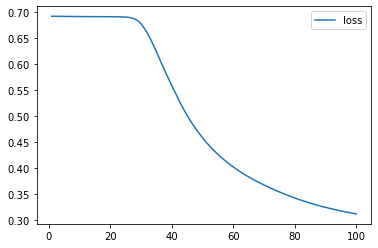

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

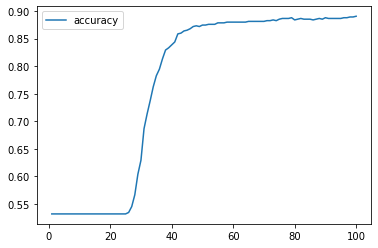

In [23]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer

number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.7147
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5995 - accuracy: 0.7813
Epoch 3/100
24/24 [==============================] - 0s 899us/step - loss: 0.5663 - accuracy: 0.8093
Epoch 4/100
24/24 [==============================] - 0s 929us/step - loss: 0.5381 - accuracy: 0.8373
Epoch 5/100
24/24 [==============================] - 0s 997us/step - loss: 0.5126 - accuracy: 0.8480
Epoch 6/100
24/24 [==============================] - 0s 929us/step - loss: 0.4901 - accuracy: 0.8627
Epoch 7/100
24/24 [==============================] - 0s 968us/step - loss: 0.4695 - accuracy: 0.8707
Epoch 8/100
24/24 [==============================] - 0s 909us/step - loss: 0.4512 - accuracy: 0.8733
Epoch 9/100
24/24 [==============================] - 0s 844us/step - loss: 0.4342 - accuracy: 0.8733
Epoch 10/100
24/24 [==============================] - 0s 920us/step - loss: 0.4179 - accuracy: 

24/24 [==============================] - 0s 928us/step - loss: 0.2023 - accuracy: 0.9200
Epoch 83/100
24/24 [==============================] - 0s 944us/step - loss: 0.2013 - accuracy: 0.9200
Epoch 84/100
24/24 [==============================] - 0s 869us/step - loss: 0.2001 - accuracy: 0.9200
Epoch 85/100
24/24 [==============================] - 0s 969us/step - loss: 0.1990 - accuracy: 0.9200
Epoch 86/100
24/24 [==============================] - 0s 958us/step - loss: 0.1979 - accuracy: 0.9200
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.9200
Epoch 88/100
24/24 [==============================] - 0s 943us/step - loss: 0.1958 - accuracy: 0.9213
Epoch 89/100
24/24 [==============================] - 0s 985us/step - loss: 0.1946 - accuracy: 0.9213
Epoch 90/100
24/24 [==============================] - 0s 950us/step - loss: 0.1935 - accuracy: 0.9213
Epoch 91/100
24/24 [==============================] - 0s 999us/step - loss: 0.1923 - accuracy: 0.